In [21]:
%%markdown
### Fine Grained PIR Sensor Fault Detection

### Fine Grained PIR Sensor Fault Detection


In [22]:
import numpy as np
import pandas as pd
import os, sys

import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
# Plotting Options
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
rcParams['figure.figsize']=7,6
plt.style.use('seaborn-whitegrid')

In [24]:
training_file_location = os.path.join(os.environ["PWD"], '../dataset/FineGrainedFaultAnalysisFeatures', 'fft-windowsize-256.csv')


training_dataset = pd.read_csv(training_file_location)
print(len(training_dataset), type(training_dataset))

16095 <class 'pandas.core.frame.DataFrame'>


In [25]:
X_prime = training_dataset.iloc[:,:-1].values
y = training_dataset.iloc[:, -1].values

In [26]:
X = preprocessing.scale(X_prime)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [28]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier()


In [29]:
y_expect= y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

                             precision    recall  f1-score   support

   Aout (ClassIII-Dust)-FFT       0.95      0.96      0.96      1323
  Aout (ClassIII-Paper)-FFT       0.96      0.95      0.96      1302
Aout (ClassIII-Plastic)-FFT       1.00      1.00      1.00      1322
          Aout (Normal)-FFT       1.00      1.00      1.00      1365

                   accuracy                           0.98      5312
                  macro avg       0.98      0.98      0.98      5312
               weighted avg       0.98      0.98      0.98      5312



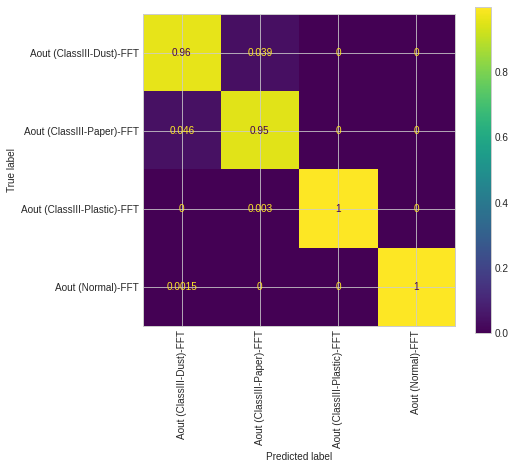

In [30]:
metrics.plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', normalize='true')